In [1]:
from skyrim.libs.benchmark import CDS

In [2]:
channels = ["u10m", "v10m", "t2m"]

In [3]:
cds = CDS(channels=channels)
cds.clear_cache()

2024-06-25 18:58:11.319 | INFO     | skyrim.libs.benchmark.cds:__init__:161 - CDS client initialized with channels: ['u10m', 'v10m', 't2m']
2024-06-25 18:58:11.320 | DEBUG    | skyrim.libs.benchmark.cds:__init__:162 - CDS cache location: /Users/m/.cache/skyrim/cds
2024-06-25 18:58:11.321 | INFO     | skyrim.libs.benchmark.cds:clear_cache:224 - Clearing cache directory: /Users/m/.cache/skyrim/cds


In [4]:
# you can enumerate the years, months, days and hours you want to fetch
# and use cds.__call__() to fetch the data
# NOTE: the data will be stored in the cache, so you can fetch it again without
# making a new request to the CDS API
year = 2024
month = 6
day = [1,2,3]
time = list(range(0,24,3))

da = cds(year=year, month=month, day=day, time=time)
print(f"da.shape: {da.shape}")
print(f"da.time.values[0:10]: {da.time.values[0:10]}")

2024-06-25 18:58:13.276 | DEBUG    | skyrim.libs.benchmark.cds:fetch_cds_dataarray:262 - Initialized cds_dataarray with shape: (24, 3, 721, 1440)
2024-06-25 18:58:13.278 | INFO     | skyrim.libs.benchmark.cds:cache:208 - Created cache directory at /Users/m/.cache/skyrim/cds
2024-06-25 18:58:13.278 | DEBUG    | skyrim.libs.benchmark.cds:_download_cds_grib_to_cache:298 - Request time: [datetime.datetime(2024, 6, 1, 0, 0), datetime.datetime(2024, 6, 1, 3, 0), datetime.datetime(2024, 6, 1, 6, 0), datetime.datetime(2024, 6, 1, 9, 0), datetime.datetime(2024, 6, 1, 12, 0), datetime.datetime(2024, 6, 1, 15, 0), datetime.datetime(2024, 6, 1, 18, 0), datetime.datetime(2024, 6, 1, 21, 0), datetime.datetime(2024, 6, 2, 0, 0), datetime.datetime(2024, 6, 2, 3, 0), datetime.datetime(2024, 6, 2, 6, 0), datetime.datetime(2024, 6, 2, 9, 0), datetime.datetime(2024, 6, 2, 12, 0), datetime.datetime(2024, 6, 2, 15, 0), datetime.datetime(2024, 6, 2, 18, 0), datetime.datetime(2024, 6, 2, 21, 0), datetime.date

da.shape: (24, 3, 721, 1440)
da.time.values[0:10]: ['2024-06-01T00:00:00.000000000' '2024-06-01T03:00:00.000000000'
 '2024-06-01T06:00:00.000000000' '2024-06-01T09:00:00.000000000'
 '2024-06-01T12:00:00.000000000' '2024-06-01T15:00:00.000000000'
 '2024-06-01T18:00:00.000000000' '2024-06-01T21:00:00.000000000'
 '2024-06-02T00:00:00.000000000' '2024-06-02T03:00:00.000000000']


In [5]:
len(da.time.values)

24

In [6]:
# you can fetch the cds data also using the CDS.benchmark() method
# especially if you are interested in quick benchmarking
# the interface uses a similar interface with the Skyrim.predict() method
date, time, lead_time, time_step = "20240601", "0000", 24*3, 1
da_bench = cds.benchmark(
    date = date, # forecast start date
    time= time, # forecast start time
    lead_time=lead_time, # 3 days
    time_step=time_step, # 1 hours
)

2024-06-25 18:59:25.192 | DEBUG    | skyrim.libs.benchmark.cds:benchmark:403 - Fetching CDS data array for benchmarking for 73 timestamps.
2024-06-25 18:59:25.198 | DEBUG    | skyrim.libs.benchmark.cds:fetch_cds_dataarray:262 - Initialized cds_dataarray with shape: (73, 3, 721, 1440)
2024-06-25 18:59:25.199 | DEBUG    | skyrim.libs.benchmark.cds:_download_cds_grib_to_cache:298 - Request time: [datetime.datetime(2024, 6, 1, 0, 0), datetime.datetime(2024, 6, 1, 1, 0), datetime.datetime(2024, 6, 1, 2, 0), datetime.datetime(2024, 6, 1, 3, 0), datetime.datetime(2024, 6, 1, 4, 0), datetime.datetime(2024, 6, 1, 5, 0), datetime.datetime(2024, 6, 1, 6, 0), datetime.datetime(2024, 6, 1, 7, 0), datetime.datetime(2024, 6, 1, 8, 0), datetime.datetime(2024, 6, 1, 9, 0), datetime.datetime(2024, 6, 1, 10, 0), datetime.datetime(2024, 6, 1, 11, 0), datetime.datetime(2024, 6, 1, 12, 0), datetime.datetime(2024, 6, 1, 13, 0), datetime.datetime(2024, 6, 1, 14, 0), datetime.datetime(2024, 6, 1, 15, 0), datet

In [11]:
# Lets compare cds ERA5 benchmark results with IFS and GFS models using the same parameters
from skyrim.libs.nwp import IFSModel, GFSModel
ifs_model = IFSModel(channels=channels)
gfs_model = GFSModel(channels=channels)

2024-06-26 12:03:46.233 | INFO     | skyrim.libs.nwp.ifs:__init__:119 - IFS model initialized with channels: ['u10m', 'v10m', 't2m']
2024-06-26 12:03:46.235 | DEBUG    | skyrim.libs.nwp.ifs:__init__:120 - IFS cache location: /Users/m/.cache/skyrim/ifs


In [16]:
# to remember the .predict method of the models
# ifs_model.predict?
# gfs_model.predict?

In [22]:
%%time
ifs_preds = ifs_model.predict(
    date=date, 
    time=time,
    lead_time=lead_time)
print(f"ifs_preds.shape: {ifs_preds.shape}")

2024-06-26 12:09:29.439 | DEBUG    | skyrim.libs.nwp.ifs:predict:235 - Forecast start time: 2024-06-01 00:00:00
2024-06-26 12:09:29.440 | DEBUG    | skyrim.libs.nwp.ifs:predict:236 - Forecast steps: [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72]
2024-06-26 12:09:29.441 | DEBUG    | skyrim.libs.nwp.ifs:predict:237 - len(steps): 25
2024-06-26 12:09:29.451 | DEBUG    | skyrim.libs.nwp.ifs:available_start_time:190 - Checking for data at prefix: 20240601/00z/
2024-06-26 12:09:29.853 | DEBUG    | skyrim.libs.nwp.ifs:fetch_ifs_dataarray:501 - Loaded u10m from /Users/m/.cache/skyrim/ifs/6b01c5378944af4f5c769940be810aac8cae9192c94b6452a23c4a168171340c
2024-06-26 12:09:30.879 | DEBUG    | skyrim.libs.nwp.ifs:fetch_ifs_dataarray:501 - Loaded v10m from /Users/m/.cache/skyrim/ifs/c194362c70f90925c78411be06b7b0d35938b8b7e2263634269fb5a87d55c8f7
2024-06-26 12:09:31.907 | DEBUG    | skyrim.libs.nwp.ifs:fetch_ifs_dataarray:501 - Loaded t2m from /Users/m

ifs_preds.shape: (25, 3, 721, 1440)
CPU times: user 2.32 s, sys: 504 ms, total: 2.82 s
Wall time: 3.47 s


In [23]:
gfs_preds = gfs_model.predict(
    date=date, 
    time=time,
    lead_time=lead_time)
print(f"gfs_preds.shape: {gfs_preds.shape}")

2024-06-26 12:09:44.960 | DEBUG    | skyrim.libs.nwp.gfs:predict:287 - Forecast start time: 2024-06-01 00:00:00
2024-06-26 12:09:44.961 | DEBUG    | skyrim.libs.nwp.gfs:predict:288 - Forecast steps: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
2024-06-26 12:09:44.962 | DEBUG    | skyrim.libs.nwp.gfs:predict:289 - len(steps): 73
2024-06-26 12:09:44.966 | DEBUG    | skyrim.libs.nwp.gfs:fetch_gfs_dataarray:410 - Creating GFS dataarray with shape: (73, 3, 721, 1440)
Fetching GFS for 2024-06-01 00:00:00:   0%|          | 0/3 [00:00<?, ?it/s]2024-06-26 12:09:44.970 | DEBUG    | skyrim.libs.nwp.gfs:_download_s3_index_to_cache:518 - Getting GFS index file from noaa-gfs-bdp-pds/gfs.20240601/00/atmos/gfs.t00z.pgrb2.0p25.f000.idx
2024-06-26 12:09:47.737 | DEBUG  

gfs_preds.shape: (73, 3, 721, 1440)


In [42]:
def extract_temp_at_location(da, lat, lon):
    return da.sel(lat=lat, lon=lon, method="nearest").sel(channel="t2m")

akyaka_coords = {"lat": 37.0557, "lon": 28.3242}
t2m_akyaka = extract_temp_at_location(da_bench, **akyaka_coords)
t2m_akyaka_ifs = extract_temp_at_location(ifs_preds, **akyaka_coords)
t2m_akyaka_gfs = extract_temp_at_location(gfs_preds, **akyaka_coords)


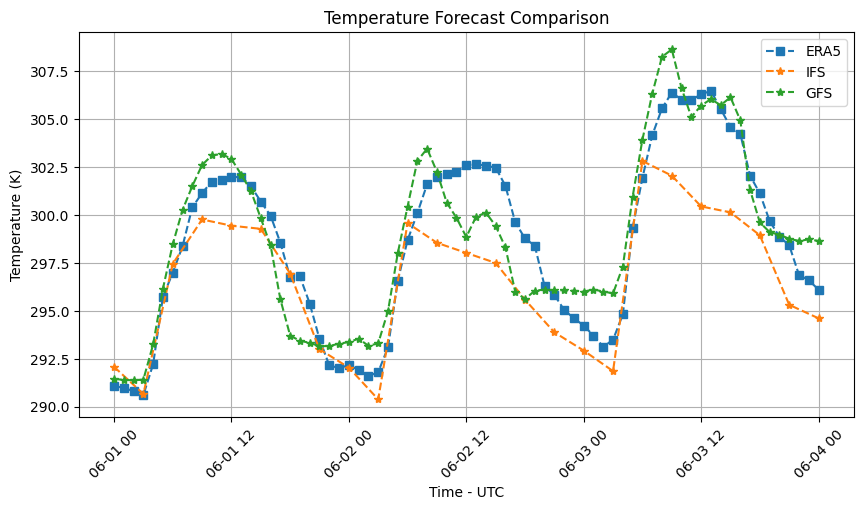

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(t2m_akyaka.time.values, t2m_akyaka.values, "--s", label="ERA5")
ax.plot(t2m_akyaka_ifs.time.values, t2m_akyaka_ifs.values, "--*", label="IFS")
ax.plot(t2m_akyaka_gfs.time.values, t2m_akyaka_gfs.values, "--*", label="GFS")  # Use ax.plot
ax.legend()

ax.set_xlabel("Time - UTC")
ax.set_ylabel("Temperature (K)")
ax.set_title("Temperature Forecast Comparison")
plt.xticks(rotation=45)
plt.grid()
plt.show()  

# NOTE: it was a HOT day INDEED!

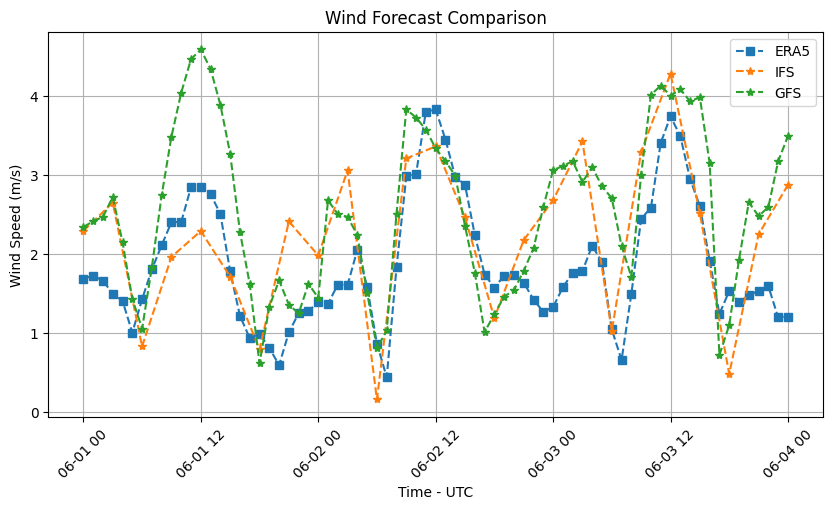

In [58]:
def extract_wind_speed_at_location(da, lat, lon):
    u10m = da.sel(lat=lat, lon=lon, method="nearest").sel(channel="u10m")
    v10m = da.sel(lat=lat, lon=lon, method="nearest").sel(channel="v10m")
    return (u10m**2 + v10m**2)**0.5

ws_akayaka = extract_wind_speed_at_location(da_bench, **akyaka_coords)
ws_akayaka_ifs = extract_wind_speed_at_location(ifs_preds, **akyaka_coords)
ws_akayaka_gfs = extract_wind_speed_at_location(gfs_preds, **akyaka_coords)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ws_akayaka.time.values, ws_akayaka.values, "--s", label="ERA5")
ax.plot(ws_akayaka_ifs.time.values, ws_akayaka_ifs.values, "--*", label="IFS")
ax.plot(ws_akayaka_gfs.time.values, ws_akayaka_gfs.values, "--*", label="GFS")  # Use ax.plot
ax.legend()

ax.set_xlabel("Time - UTC")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Wind Forecast Comparison")
plt.xticks(rotation=45)
plt.grid()
plt.show()